# Logistic Regression

In [30]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import(
accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#create binary classification dataset
X,y =make_classification(n_samples=1000, n_classes=2, random_state=42)
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
#train logistic regression model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
#predict class labels
y_pred=model.predict(X_test)

In [38]:
#predict probabilites for class1 
y_probs=model.predict_proba(X_test)[:,1]

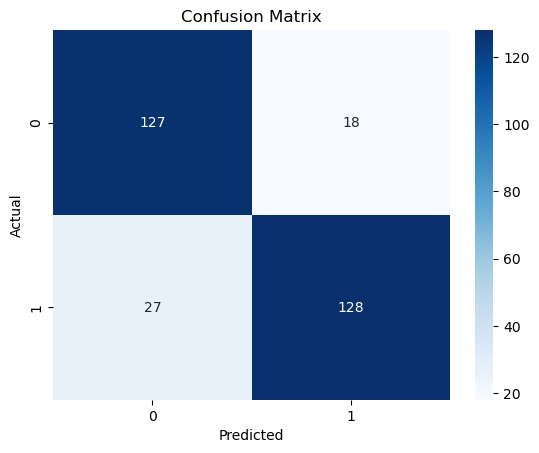

In [39]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [40]:
#logistic regression performance metrics
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))
print("ROC AUC Source:", roc_auc_score(y_test,y_pred))

Accuracy: 0.85
Precision: 0.8767123287671232
Recall: 0.8258064516129032
F1 Score: 0.8504983388704319
ROC AUC Source: 0.8508342602892102


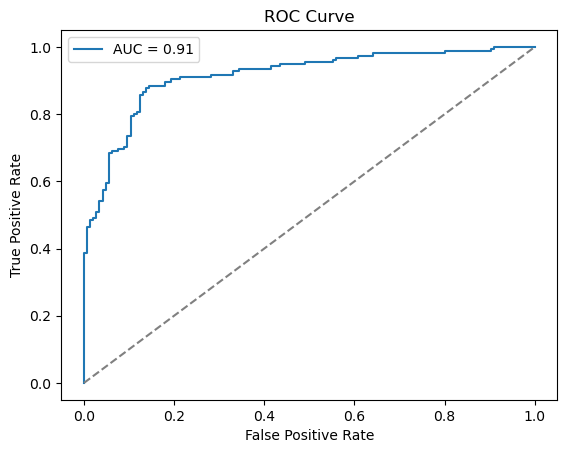

In [41]:
# --- ROC Curve ---
# ROC (Receiver Operating Characteristic) Curve helps visualize how well the model distinguishes
# between the two classes across all thresholds. It plots TPR (Recall) vs FPR.
# The closer the curve follows the top-left corner, the better the model is.
# AUC (Area Under Curve) summarizes this performance into a single value.
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random chance line

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()